##  텍스트기반의 다중 분류

환경 로드

In [5]:
from sklearn.datasets import fetch_20newsgroups #data 로드
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer #토큰
from tensorflow.keras.utils import to_categorical #원핫인코딩 (정수형 범주)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data 로드

In [2]:
data = fetch_20newsgroups()
X_data = data.data
Y_data = data.target

data 전처리

In [3]:
tk = Tokenizer(num_words=10000)
tk.fit_on_texts(X_data)
X = tk.texts_to_matrix(X_data,mode = 'tfidf') #mode = [binary,conut,tfidf]
Y = to_categorical(Y_data)
t_x, tt_x, t_y, tt_y = train_test_split(X,Y)

In [10]:
t_x.shape, t_y.shape

((8485, 10000), (8485, 20))

모델 생성 및 학습

In [6]:
m = Sequential()
m.add(Dense(256,input_shape = (10000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(20,activation='softmax'))
m.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
hy = m.fit(t_x,t_y,epochs=10,validation_data=(tt_x, tt_y))

Epoch 1/10
266/266 [==============================] - 7s 25ms/step - loss: 1.9217 - accuracy: 0.4457 - val_loss: 0.6565 - val_accuracy: 0.8409
Epoch 2/10
266/266 [==============================] - 4s 16ms/step - loss: 0.7110 - accuracy: 0.8110 - val_loss: 0.5371 - val_accuracy: 0.8795
Epoch 3/10
266/266 [==============================] - 5s 20ms/step - loss: 0.4095 - accuracy: 0.8968 - val_loss: 0.5429 - val_accuracy: 0.8823
Epoch 4/10
266/266 [==============================] - 4s 16ms/step - loss: 0.2734 - accuracy: 0.9352 - val_loss: 0.6332 - val_accuracy: 0.8996
Epoch 5/10
266/266 [==============================] - 5s 19ms/step - loss: 0.2524 - accuracy: 0.9463 - val_loss: 0.6039 - val_accuracy: 0.8932
Epoch 6/10
266/266 [==============================] - 5s 19ms/step - loss: 0.2054 - accuracy: 0.9547 - val_loss: 0.6499 - val_accuracy: 0.8929
Epoch 7/10
266/266 [==============================] - 6s 24ms/step - loss: 0.2085 - accuracy: 0.9610 - val_loss: 0.7102 - val_accuracy: 0.8954

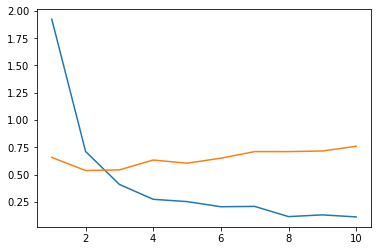

In [7]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])